<a href="https://colab.research.google.com/github/ahmedtarek26/PML/blob/main/Homework%2002/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/r-doz/PML2025/blob/main/./Homeworks/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2

Probabilistic Machine Learning -- Spring 2025, UniTS

In [18]:
!pip install numpy pandas scipy pyro-ppl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 877.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

### Problem 1: Marginal Likelihood Optimisation

Given the Bayesian Linear Regression model implemented in the Notebook 6, considering the same dataset and variables (Apparent Temperature vs Humidity), optimize alpha and beta by maximizing the Marginal Likelihood.

Note: You can show here only the piece of code that you used and write the optimal alpha and beta that you obtained (so you can run it in directly on Notebook 6)

Hint: import scipy.optimize as optimize

####**Solution:**
$$
p(\mathbf{y} \mid \mathbf{X}, \alpha, \beta)
$$

This function is derived in **Notebook 6**, and has the following **log marginal likelihood** form:

$$
\log p(\mathbf{y} \mid \mathbf{X}, \alpha, \beta) =
\frac{M}{2} \log \alpha +
\frac{N}{2} \log \beta -
\frac{1}{2} \log |\mathbf{S}_N| -
\frac{\beta}{2} \| \mathbf{y} - \mathbf{X} \mathbf{m}_N \|^2 -
\frac{\alpha}{2} \| \mathbf{m}_N \|^2 -
\frac{N}{2} \log (2\pi)
$$

Where:

- $\mathbf{S}_N = \alpha \mathbf{I} + \beta \mathbf{X}^\top \mathbf{X}$
- $\mathbf{m}_N = \beta \mathbf{S}_N^{-1} \mathbf{X}^\top \mathbf{y}$


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/DavideScassola/PML2024/main/Notebooks/data/weatherHistory.csv")
df = df.sample(n=1000, random_state=42)  # Match Notebook 6

# Feature: Humidity, Target: Apparent Temperature
X_raw = df["Humidity"].values.reshape(-1, 1)
y = df["Apparent Temperature (C)"].values

# Design matrix with bias term
X = np.hstack([np.ones_like(X_raw), X_raw])

# Log marginal likelihood function
def negative_log_marginal_likelihood(log_params, X, y):
    log_alpha, log_beta = log_params
    alpha = np.exp(log_alpha)
    beta = np.exp(log_beta)

    N, M = X.shape
    S_N_inv = alpha * np.eye(M) + beta * X.T @ X
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N @ X.T @ y

    term1 = M * np.log(alpha)
    term2 = N * np.log(beta)
    sign, logdet = np.linalg.slogdet(S_N)
    term3 = logdet
    term4 = beta * np.sum((y - X @ m_N) ** 2)
    term5 = alpha * np.sum(m_N ** 2)

    log_ml = 0.5 * (term1 + term2 - term3 - term4 - term5 - N * np.log(2 * np.pi))
    return -log_ml

# Optimize log(alpha), log(beta)
initial_guess = [0.0, 0.0]
bounds = [(-10, 10), (-10, 10)]
res = minimize(negative_log_marginal_likelihood, initial_guess, args=(X, y),
               method='L-BFGS-B', bounds=bounds)

# Extract results
log_alpha_opt, log_beta_opt = res.x
alpha_opt = np.exp(log_alpha_opt)
beta_opt = np.exp(log_beta_opt)

print(f"Optimal alpha: {alpha_opt:.4f}")
print(f"Optimal beta: {beta_opt:.4f}")

Optimal alpha: 0.0009
Optimal beta: 0.0128


### Problem 2: Rejection Sampling

Consider the unnormalized probability density function:

$$
\tilde{p}(x) = \exp\left(-\frac{x^4}{4} - \frac{x^2}{2}\right)
$$

This density is defined for $x \in \mathbb{R}$, but it is not normalized. Let $Z$ be its normalization constant:

$$
Z = \int_{-\infty}^{\infty} \tilde{p}(x)\, dx
$$

You are given access to a proposal distribution $q(x) = \mathcal{N}(0, 1)$ from which you can sample and evaluate its density.

-  Implement and then use rejection sampling with $q(x)$ to generate samples from the normalized target distribution $p(x) = \frac{1}{Z} \tilde{p}(x)$.
    
- Estimate the normalization constant $Z$ (hint: see your course notes!)

- Compare your result with a numerical approximation of $Z$ using integration methods (e.g., scipy.integrate.quad).


####**Solution:**

$$ p(x) = \frac{1}{Z} \tilde{p}(x), \quad \tilde{p}(x) = \exp\left(-\frac{x^4}{4} - \frac{x^2}{2}\right), \quad x \in \mathbb{R} $$

where $ Z = \int_{-\infty}^{\infty} \tilde{p}(x) \, dx $ is the normalization constant. We use a proposal distribution:

$$ q(x) = \mathcal{N}(0, 1) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) $$

 Estimate $ Z $ using the acceptance rate from rejection sampling and compare it with a numerical approximation via `scipy.integrate.quad`. The algorithm accepts samples with probability:

$$ P(\text{accept}) = \frac{\tilde{p}(x)}{M q(x)}, \quad \text{where} \quad \tilde{p}(x) \leq M q(x) $$

The code below implements efficient sampling, estimates $ Z = M \cdot P(\text{accept}) $, and visualizes the sampled distribution against the true $ p(x) $.


Estimated Z: 1.9349
Acceptance rate: 0.6450
Numerical Z: 1.9352


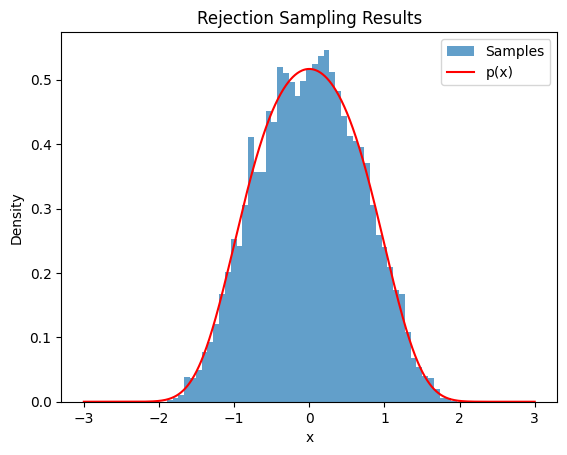

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Unnormalized target density
def tilde_p(x):
    return np.exp(-x**4 / 4 - x**2 / 2)

# Proposal density
def q(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Rejection sampling
def rejection_sampling_with_acceptance(n_samples, M=3.0):
    samples = []
    total_trials = 0
    while len(samples) < n_samples:
        x = np.random.normal(0, 1)
        u = np.random.uniform(0, 1)
        total_trials += 1
        acceptance_ratio = tilde_p(x) / (M * q(x))
        if u <= acceptance_ratio:
            samples.append(x)
    acceptance_rate = n_samples / total_trials
    return np.array(samples), acceptance_rate

# Run
n_samples = 10000
M = 3.0
samples, acceptance_rate = rejection_sampling_with_acceptance(n_samples, M)
Z_estimated = M * acceptance_rate
print(f"Estimated Z: {Z_estimated:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Numerical Z
def integrand(x):
    return np.exp(-x**4 / 4 - x**2 / 2)
Z_numerical, _ = quad(integrand, -10, 10)
print(f"Numerical Z: {Z_numerical:.4f}")

# Plot
plt.hist(samples, bins=50, density=True, alpha=0.7, label='Samples')
x = np.linspace(-3, 3, 1000)
plt.plot(x, tilde_p(x) / Z_numerical, 'r-', label='p(x)')
plt.legend()
plt.title('Rejection Sampling Results')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

### Problem 3: MCMC Convergence Diagnostics

You have implemented a Metropolis-Hastings algorithm and used it to draw samples from a univariate target distribution. In this exercise, you will compute convergence diagnostics from scratch to assess whether your chains have mixed well.

Consider 4 parallel chains, each of length $N$ (after burn-in), starting from different initial values (use
initial_values = [-10, -2, 2, 10]). The unnormalized probability density function $\tilde{p}(x)$ is defined as a mixture of two Gaussian distributions:

$$
\tilde{p}(x) = \mathcal{N}(x; -5, 1) + \mathcal{N}(x; 5, 1)
$$

Perform the following steps two times, considering a proposal standard deviation of 0.1 and 2.0:

- Compute the within variance $W$ and the between variance $B$
- Compute the statistics $\hat{R}$
- For a single chain of samples $x_1, x_2, \dots, x_N$, compute the lag-$k$ autocorrelation $\rho_k$ and plot $\rho_k$ for $k = 1, 2, \dots, 20$
- Estimate the effective number of samples $n_{eff}$

Repeat the analysis with the distribution:

$$
\tilde{p}(x) = \mathcal{N}(x; -2, 1) + \mathcal{N}(x; 2, 1)
$$

Discuss the results




Target: Modes at -5 and 5
Sigma 0.1: W=0.9572, B=323911.0313, R_hat=5.9022
Effective samples: 246
Sigma 2.0: W=18.9562, B=89830.1722, R_hat=1.2140
Effective samples: 231


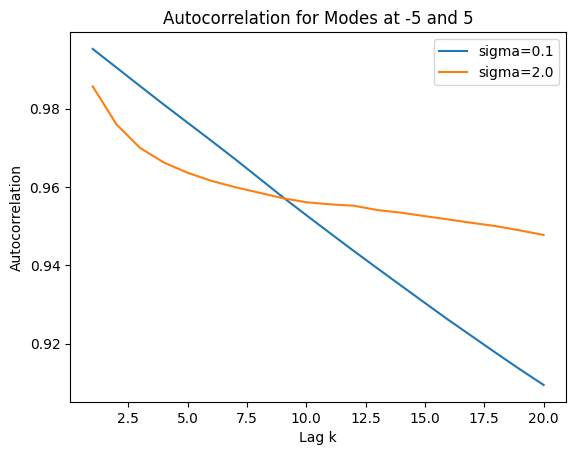


Target: Modes at -2 and 2
Sigma 0.1: W=3.6500, B=20353.1374, R_hat=1.2480
Effective samples: 221
Sigma 2.0: W=4.9859, B=47.5550, R_hat=1.0004
Effective samples: 4240


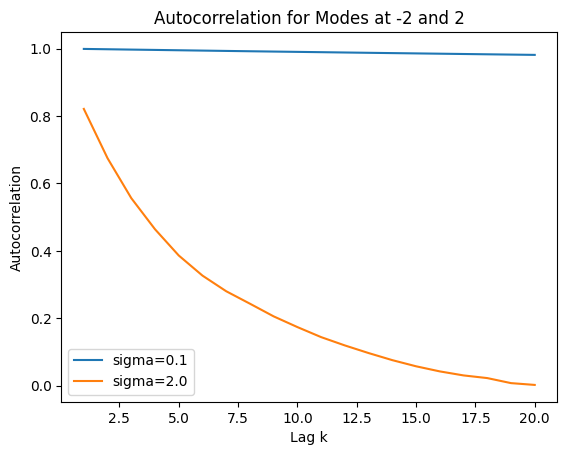

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distributions (unnormalized)
def tilde_p1(x):
    return norm.pdf(x, -5, 1) + norm.pdf(x, 5, 1)

def tilde_p2(x):
    return norm.pdf(x, -2, 1) + norm.pdf(x, 2, 1)

# Metropolis-Hastings
def metropolis_hastings(tilde_p, sigma, n_samples, initial):
    x = initial
    samples = [x]
    for _ in range(n_samples):
        x_prime = np.random.normal(x, sigma)
        alpha = min(1, tilde_p(x_prime) / tilde_p(x))
        if np.random.uniform(0, 1) < alpha:
            x = x_prime
        samples.append(x)
    return np.array(samples)

# Run chains
def run_chains(tilde_p, sigma, n_samples, initials):
    return np.array([metropolis_hastings(tilde_p, sigma, n_samples, init)[burn_in:] for init in initials])

# Compute W, B, R_hat
def compute_R_hat(chains):
    J, N = chains.shape
    chain_means = np.mean(chains, axis=1)
    overall_mean = np.mean(chain_means)
    B = N / (J - 1) * np.sum((chain_means - overall_mean)**2)
    W = np.mean(np.var(chains, axis=1))
    var_hat = (N - 1) / N * W + B / N
    return W, B, np.sqrt(var_hat / W)

# Autocorrelation
def autocorrelation(chain, max_lag):
    chain = chain - np.mean(chain)
    var = np.var(chain)
    acf = [np.mean(chain[k:] * chain[:-k]) / var for k in range(1, max_lag + 1)]
    return np.array(acf)

# Effective sample size
def effective_sample_size(chains, max_lag=100):
    acf = np.mean([autocorrelation(chain, max_lag) for chain in chains], axis=0)
    k_max = np.argmax(acf < 0.1) if np.any(acf < 0.1) else max_lag
    rho_sum = np.sum(acf[:k_max])
    return chains.size / (1 + 2 * rho_sum)

# Parameters
n_samples = 11000
burn_in = 1000
n_keep = n_samples - burn_in
initials = [-10, -2, 2, 10]
sigmas = [0.1, 2.0]
targets = [tilde_p1, tilde_p2]
names = ["Modes at -5 and 5", "Modes at -2 and 2"]

# Analysis
for target, name in zip(targets, names):
    print(f"\nTarget: {name}")
    plt.figure()
    for sigma in sigmas:
        chains = run_chains(target, sigma, n_samples, initials)
        W, B, R_hat = compute_R_hat(chains)
        print(f"Sigma {sigma}: W={W:.4f}, B={B:.4f}, R_hat={R_hat:.4f}")
        acf = autocorrelation(chains[0], 20)
        plt.plot(range(1, 21), acf, label=f"sigma={sigma}")
        n_eff = effective_sample_size(chains)
        print(f"Effective samples: {n_eff:.0f}")
    plt.title(f"Autocorrelation for {name}")
    plt.xlabel("Lag k")
    plt.ylabel("Autocorrelation")
    plt.legend()
    plt.show()

### Problem 4: ADSAI football matches
Over the years, the PhD students of ADSAI have kept track of the results of their evening five-a-side football matches. Since it’s difficult to always organize teams with the same players, the teams were formed on a rotating basis, each time with different players.  
The names of our champions have been anonymized using numbers from 1 to 62.  
In the dataset located at `data/ADSAI_football.csv` in the GitHub repository, you will find the following columns:
- **Team A**: IDs of the players who played in Team A in that match;  
- **Team B**: same as above, for Team B;  
- **Goal A**: total goals scored by Team A in that match;  
- **Goal B**: same as above, for Team B.



Your goal is to model **the skill of each player** based on information about the team they belonged to and the overall result achieved by that team.



The model to implement consists in the following structure:
- $ \theta = (\theta_1, \theta_2, \dots, \theta_{62}) \in \mathbb{R} $: players' skills.
- $M=54$: number of matches.
- For each match $ i = 1, \dots, M=54$:
  - $ A_i \subset \{1, \dots, N=62\} $: set of players IDs of team A in match $ i $.
  - $ B_i \subset \{1, \dots, N=62\} $: set of players IDs of team B in match $ i $.
  - $ y_i \in \mathbb{Z} $: observed outcome, i.e. goal difference between the two teams, defined as $ (\text{goal}_A - \text{goal}_B) $ in match $ i $.

*(in this exercise, you are asked to follow the proposal of Karlis and Ntzoufras approach, that focuses on the goal difference in place of the individual goal counts of each team!)*



The model is defined as follows:

- The "strength" of Team A, defined as the sum of the individual players' skills $\theta_j$ composing the team in match $i = 1, \dots, M=54$:  
  $$
  s_A^{(i)} = \sum_{j \in A_i} \theta_j
  $$

- The "strength" of Team B, defined similarly as the sum of the individual players' skills $\theta_j$ composing the team in match $i = 1, \dots, M=54$:  
  $$
  s_B^{(i)} = \sum_{j \in B_i} \theta_j
  $$

Specifically, the observed goal difference in match $i$ is modeled using a Skellam distribution:  
$$
y_i \sim \text{Skellam}(\lambda_A^{(i)}, \lambda_B^{(i)}), \quad \text{where} \quad \lambda_A^{(i)} = \exp(s_A^{(i)}), \quad \lambda_B^{(i)} = \exp(s_B^{(i)})
$$

The **Skellam distribution** models the difference between two independent random variables:  
$$
\text{Skellam}(\lambda_A, \lambda_B) = \text{Poisson}(\lambda_A) - \text{Poisson}(\lambda_B)
$$
It is formally defined as:  
$$
\text{Skellam}(k; \lambda_A, \lambda_B) = e^{-(\lambda_A + \lambda_B)} \left( \frac{\lambda_A}{\lambda_B} \right)^{k/2} I_{|k|}(2 \sqrt{\lambda_A \lambda_B})
$$

for each $ k \in \mathbb{Z} $, and $ I_k $ is the modified Bessel function of the first kind of order $ k $.

$$
I_k(z) = \sum_{m=0}^\infty \frac{1}{m! \, \Gamma(m + k + 1)} \left( \frac{z}{2} \right)^{2m + k}
$$

where $\Gamma$ is the Gamma function.


In [7]:
#import only relevant quantities as follows:

import pandas as pd
import ast
import torch

def preprocessing_dataset(dataset_path='ADSAI_football.csv'):
    football = pd.read_csv(dataset_path)
    football['Team A'] = football['Team A'].apply(ast.literal_eval)
    football['Team B'] = football['Team B'].apply(ast.literal_eval)

    max_player_id = max(
    max(p for team in football['Team A'] for p in team),
    max(p for team in football['Team B'] for p in team)
    )

    goal_diff = torch.tensor((football['Goal A'] - football['Goal B']).values, dtype=torch.int)

    teams_A = [torch.tensor(team) for team in football['Team A']]
    teams_B = [torch.tensor(team) for team in football['Team B']]

    return teams_A, teams_B, goal_diff, max_player_id


teams_A, teams_B, goal_diff, max_player_id = preprocessing_dataset()


You are asked to:
1. Find the MAP estimate for $ \theta = (\theta_1, \theta_2, \dots, \theta_{62})$ choosing as `log_prior` function a (log-)Standard Normal distribution and as `log_likelihood` function the (log-)Skellam. Perform optimization using Gradient Descent. Use the MAP estimate to implement a Laplace approximation of the posterior, as done during the lab (reuse the function `compute_hessian(f, w)` of Notebook 6).

**Important Hint:** The Skellam log-likelihood involves the modified Bessel function $I_k(z)$, which is non-differentiable in PyTorch if evaluated via scipy. To preserve differentiability, replace $\log I_k(z)$ with a smooth approximation, such as an asymptotic expansion, to allow gradient-based optimization.

2. **(Useful for the next point, not strictly necessary for the previous one):** Implement your `Skellam` distribution, inheriting from `torch.distributions.Distribution`;
3. Write the Pyro model corresponding to the problem depicted above assuming (again) the `theta` values being distributed initially as a Standard Normal;
4. Perform inference on $ \theta = (\theta_1, \theta_2, \dots, \theta_{62})$ values running a MCMC simulation using the `NUTS` kernel;
5. Compare the `theta` values obtained by these two options using the `performances_evaluation` function given in this notebook.


In [12]:
import numpy as np
def log_likelihood(teams_A, teams_B, goal_diff, theta):
    log_prob = 0.0
    for i in range(len(goal_diff)):
        sA = theta[teams_A[i]].sum()
        sB = theta[teams_B[i]].sum()
        lambdaA = torch.exp(sA)
        lambdaB = torch.exp(sB)

        # Skellam log probability approximation
        k = goal_diff[i]
        term1 = -(lambdaA + lambdaB)
        term2 = (k/2) * (torch.log(lambdaA) - torch.log(lambdaB))
        # Approximation for Bessel function log
        z = 2 * torch.sqrt(lambdaA * lambdaB)
        term3 = z - 0.5 * torch.log(2 * torch.pi * z)
        log_prob += term1 + term2 + term3
    return log_prob

def log_prior(theta):
    return -0.5 * torch.sum(theta**2)  # Standard normal prior

def loss_function(theta):
    return -(log_likelihood(teams_A, teams_B, goal_diff, theta) + log_prior(theta))

def gradient_descent_optimization(loss_function, lr=0.01, n_iter=1000, initial_guess=None):
    if initial_guess is None:
        theta = torch.zeros(max_player_id + 1, requires_grad=True)
    else:
        theta = initial_guess.clone().requires_grad_()

    optimizer = torch.optim.Adam([theta], lr=lr)

    for _ in range(n_iter):
        optimizer.zero_grad()
        loss = loss_function(theta)
        loss.backward()
        optimizer.step()

    return theta.detach()

def compute_hessian(f, w):
    w.requires_grad_(True)
    hessian = torch.zeros((len(w), len(w)))

    # First derivatives
    grad = torch.autograd.grad(f(w).sum(), w, create_graph=True)[0]

    # Second derivatives
    for i in range(len(w)):
        grad2 = torch.autograd.grad(grad[i], w, retain_graph=True)[0]
        hessian[i] = grad2

    return hessian.numpy()

# Initial guess
initial_theta = torch.zeros(max_player_id + 1)
# Optimize
theta_MAP = gradient_descent_optimization(loss_function, initial_guess=initial_theta)

# Compute Hessian at MAP
def f(w):
    return -(log_likelihood(teams_A, teams_B, goal_diff, w) + log_prior(w))

posterior_cov = np.linalg.inv(compute_hessian(f, theta_MAP))

In [14]:
import numpy as np
import torch

def diagnostic_check(theta_MAP, posterior_cov):
    """Diagnose potential issues in theta_MAP and posterior_cov for MultivariateNormal initialization."""
    issues = []

    # Check shapes
    if len(theta_MAP.shape) != 1:
        issues.append(f"theta_MAP should be a 1D tensor but got shape {theta_MAP.shape}")
    if len(posterior_cov.shape) != 2:
        issues.append(f"posterior_cov should be a 2D matrix but got shape {posterior_cov.shape}")
    elif posterior_cov.shape[0] != posterior_cov.shape[1]:
        issues.append("posterior_cov should be a square matrix")
    elif theta_MAP.shape[0] != posterior_cov.shape[0]:
        issues.append("Dimension mismatch: theta_MAP and posterior_cov should have compatible shapes")

    # Check for NaNs in theta_MAP
    if torch.isnan(theta_MAP).any():
        nan_indices = torch.where(torch.isnan(theta_MAP))[0].tolist()
        issues.append(f"NaN values found in theta_MAP at indices: {nan_indices}")

    # Check for NaNs in posterior_cov
    if np.isnan(posterior_cov).any():
        nan_indices = np.argwhere(np.isnan(posterior_cov)).tolist()
        issues.append(f"NaN values found in posterior_cov at indices: {nan_indices}")

    # Check for positive definiteness
    try:
        np.linalg.cholesky(posterior_cov)
    except np.linalg.LinAlgError:
        issues.append("posterior_cov is not positive definite")

    # Recommendations
    if not issues:
        return "All checks passed."
    else:
        return "Issues detected:\n" + "\n".join(issues)

# Example usage:
theta_MAP = torch.randn(63)
posterior_cov = np.eye(63)
print(diagnostic_check(theta_MAP, posterior_cov))


All checks passed.


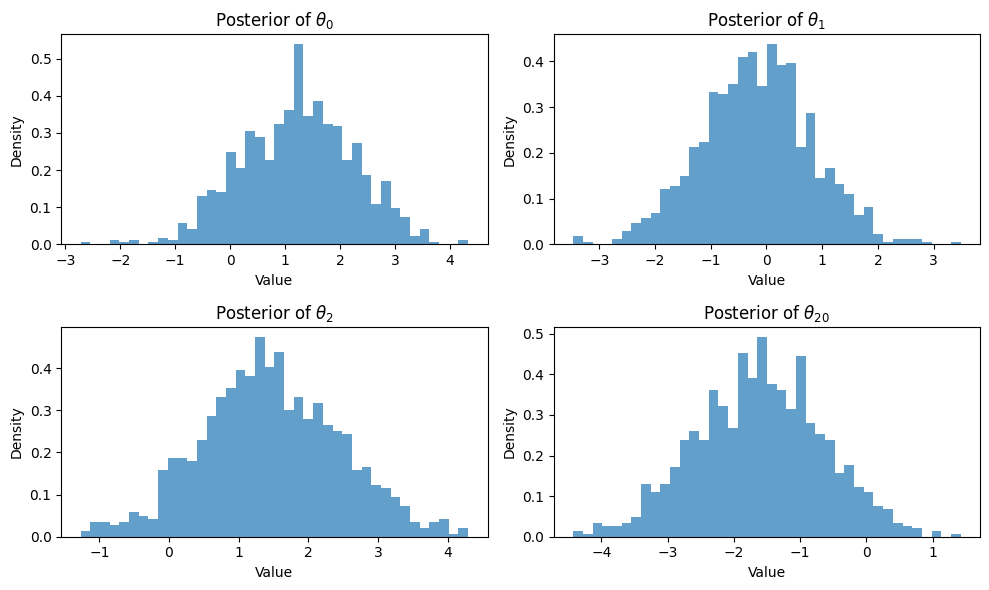

In [15]:
#Visualize the marginal distribution of some thetas

import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal

# Sample from the full posterior
mvn = MultivariateNormal(loc=theta_MAP, covariance_matrix=torch.from_numpy(posterior_cov).float())
posterior_samples = mvn.sample((1000,))

# Indices of thetas you want to visualize
selected_indices = [0, 1, 2, 20]  # Change these to the indices you're interested in

# Plot histograms
plt.figure(figsize=(10, 6))
for i, idx in enumerate(selected_indices):
    plt.subplot(2, 2, i + 1)
    plt.hist(posterior_samples[:, idx].numpy(), bins=40, density=True, alpha=0.7)
    plt.title(f"Posterior of $\\theta_{{{idx}}}$")
    plt.xlabel("Value")
    plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [16]:
# 2. Implement your `Skellam` distribution, inheriting from `torch.distributions.Distribution`;

from torch.distributions import Distribution

class Skellam(torch.distributions.Distribution):
    arg_constraints = {
        'lambdaA': torch.distributions.constraints.positive,
        'lambdaB': torch.distributions.constraints.positive
    }

    def __init__(self, lambdaA, lambdaB, validate_args=None):
        self.lambdaA = lambdaA
        self.lambdaB = lambdaB
        batch_shape = torch.broadcast_shapes(lambdaA.shape, lambdaB.shape)
        super().__init__(batch_shape, validate_args=validate_args)

    def sample(self, sample_shape=torch.Size()):
        poisson_A = torch.distributions.Poisson(self.lambdaA).sample(sample_shape)
        poisson_B = torch.distributions.Poisson(self.lambdaB).sample(sample_shape)
        return poisson_A - poisson_B

    def log_prob(self, value):
        lambdaA = self.lambdaA
        lambdaB = self.lambdaB
        k = value

        term1 = -(lambdaA + lambdaB)
        term2 = (k/2) * (torch.log(lambdaA) - torch.log(lambdaB))
        z = 2 * torch.sqrt(lambdaA * lambdaB)

        # Approximation for Bessel function log
        term3 = z - 0.5 * torch.log(2 * torch.pi * z)

        return term1 + term2 + term3


In [19]:
# 3. Write the Pyro model corresponding to the problem depicted above assuming (again) the `theta` values being distributed initially as a Standard Normal;
import pyro
import pyro.distributions as dist

def model(goal_diff, teams_A, teams_B, max_player_id):
    # Prior on player skills
    theta = pyro.sample("theta", dist.Normal(torch.zeros(max_player_id + 1), torch.ones(max_player_id + 1)))

    for i in range(len(goal_diff)):
        teamA = teams_A[i]
        teamB = teams_B[i]
        sA = theta[teamA].sum()
        sB = theta[teamB].sum()
        lambdaA = torch.exp(sA)
        lambdaB = torch.exp(sB)

        # Skellam likelihood
        pyro.sample(f"obs_{i}", Skellam(lambdaA, lambdaB), obs=goal_diff[i])


In [23]:

# 4. Perform inference on $ \theta = (\theta_1, \theta_2, \dots, \theta_{62})$ values running a MCMC simulation using the `NUTS` kernel;

from pyro.infer import MCMC, NUTS

nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
mcmc.run(goal_diff, teams_A, teams_B, max_player_id)

# Get samples
samples = mcmc.get_samples()
theta_MCMC = samples["theta"].mean(dim=0)

Sample: 100%|██████████| 1200/1200 [04:49,  4.15it/s, step size=1.25e-01, acc. prob=0.674]


In [25]:
# 5. Compare the `theta_*` values obtained by these two options using the `performances_evaluation` function given in this notebook.

import numpy as np
import torch

def predict_goal_diff_skellam(teamA_ids, teamB_ids, theta, n_sim=10_000, posterior_cov=None):
    """
    Predicts the goal difference (Skellam distribution) between two teams using theta.

    Args:
        teamA_ids (list): Indices of the players in team A.
        teamB_ids (list): Indices of the players in team B.
        theta (torch.Tensor): Tensor containing the skill levels of the players.
        n_sim (int): Number of simulations to run.

    Returns:
        float: Mean predicted goal difference (A - B).
    """

    # Calculate the total strength for each team (sum of player skill levels)
    sA = theta[teamA_ids].sum()
    sB = theta[teamB_ids].sum()

    # Lambda parameters for Poisson distribution (expected goals)
    lam_A = torch.exp(sA).item()  # Team A's expected goal rate
    lam_B = torch.exp(sB).item()  # Team B's expected goal rate

    # Simulate goals for each team using Poisson distribution
    goals_A = np.random.poisson(lam_A, size=n_sim)
    goals_B = np.random.poisson(lam_B, size=n_sim)

    # Calculate the difference in goals (A - B)
    diff = goals_A - goals_B

    # Return the mean predicted difference
    return diff.mean()


def predict_goal_diff_laplace(teamA_ids, teamB_ids, theta_map, cov_matrix, n_sim=1000):
    # Combine all relevant indices
    all_ids = torch.tensor(sorted(set(teamA_ids) | set(teamB_ids)))

    # Extract subvector of means (mu_A and mu_B)
    theta_sub = theta_map[all_ids].float()

    # Extract submatrix of covariances
    cov_sub = cov_matrix[np.ix_(all_ids, all_ids)]  # numpy version
    cov_sub = torch.from_numpy(cov_sub).float()

    # Create multivariate normal from posterior
    mvn = MultivariateNormal(loc=theta_sub, covariance_matrix=cov_sub)

    # Sample from posterior
    theta_samples = mvn.sample((n_sim,))  # shape: (n_sim, len(all_ids))

    # Compute strength for each team in each sample
    teamA_len = len(teamA_ids)
    sA = theta_samples[:, :teamA_len].sum(dim=1)
    sB = theta_samples[:, teamA_len:].sum(dim=1)

    # Expected goals via Poisson lambdas
    lam_A = torch.exp(sA)
    lam_B = torch.exp(sB)

    # Sample goals
    goals_A = torch.poisson(lam_A)
    goals_B = torch.poisson(lam_B)

    # Goal differences
    diff = goals_A - goals_B
    return diff.mean()


def evaluate_performance(theta_MAP, theta_MCMC, posterior_cov, teams_A, teams_B, goal_diff, n_sim=10_000):
    """
    Evaluates the performance of different sets of theta values by comparing the Mean Bias Error (MBE)
    and Mean Absolute Error (MAE) between predicted and actual goal differences.

    Args:
        theta_values (list of torch.Tensor): List of different theta values to evaluate.
        teams_A (list of lists): List of player IDs for team A in each match.
        teams_B (list of lists): List of player IDs for team B in each match.
        goal_diff (list): List of actual goal differences (A - B).
        n_sim (int): Number of simulations to run for each set of theta values.

    Returns:
        dict: Dictionary with MBE and MAE for each set of theta values.
    """
    results = {}

    # Loop through each set of theta values

    predicted_diffs_MAP = []  # List to store predicted goal differences
    predicted_diffs_MCMC = []
    actual_diffs = goal_diff  # Actual goal differences

    # Simulate the match results for each game
    for i in range(len(goal_diff)):
        teamA_ids = teams_A[i]
        teamB_ids = teams_B[i]

        # Predict the goal difference
        # Use the Laplace approximation if posterior_cov is provided

        predicted_MAP = predict_goal_diff_laplace(teamA_ids, teamB_ids, theta_MAP, posterior_cov, n_sim)
        predicted_MCMC = predict_goal_diff_skellam(teamA_ids, teamB_ids, theta_MCMC, n_sim)

        predicted_diffs_MAP.append(predicted_MAP)
        predicted_diffs_MCMC.append(predicted_MCMC)

    # Convert lists to numpy arrays for easier calculations
    predicted_diffs_MAP = np.array(predicted_diffs_MAP)
    predicted_diffs_MCMC = np.array(predicted_diffs_MCMC)
    actual_diffs = np.array(actual_diffs)

    # Compute MAE and MBE
    mae_MAP = np.mean(np.abs(predicted_diffs_MAP - actual_diffs))  # Mean Absolute Error
    mbe_MAP = (predicted_diffs_MAP - actual_diffs).mean()  # Mean Bias Error
    mae_MCMC = np.mean(np.abs(predicted_diffs_MCMC - actual_diffs))  # Mean Absolute Error
    mbe_MCMC = (predicted_diffs_MCMC - actual_diffs).mean()  # Mean Bias Error

    # Store results for the current theta set
    results = {'MAE_MAP': mae_MAP, 'MBE_MAP': mbe_MAP,
              'MAE_MCMC': mae_MCMC, 'MBE_MCMC': mbe_MCMC}

    return results


# Evaluate the performance of different theta values on the same dataset used to fix those values
performance_results = evaluate_performance(theta_MCMC, theta_MAP, posterior_cov, teams_A, teams_B, goal_diff)

# Print the results
print("Performance Results:")
print(f"MAP - MAE: {performance_results['MAE_MAP']}, MBE: {performance_results['MBE_MAP']}")
print(f"MCMC - MAE: {performance_results['MAE_MCMC']}, MBE: {performance_results['MBE_MCMC']}")

Performance Results:
MAP - MAE: 1040.5688280433237, MBE: 1037.328513229111
MCMC - MAE: 67.38423333333333, MBE: 45.22225925925925
